# Классификация цветов с помощью свёрточных нейронных сетей. 

**Цели и задачи**

Цель лабораторной работы: изучить процесс классификации цветов с помощью свёрточной нейронной сети на примере данных с kaggle.

Задачи:

* Изучить библиотеки TensorFlow-Keras, torch-torchvision, NumPy и Matplotlib.

* Загрузить и предобработать данные.

* Разбить данные на обучающую и проверочную выборки.

* Определить архитектуру свёрточной нейронной сети.

* Обучить модель на обучающей выборке.

* Оценить качество модели на проверочной выборке.

* Подобрать оптимальные гиперпараметры модели на основе результатов на проверочной выборке.

* Протестировать модель на проверочной (тестовой) выборке.

* Оценить качество модели на основе метрик.

* Построить графики, чтобы проанализировать процесс обучения и оценки качества модели на обучающей, проверочной выборках.

**Используемые инструменты**
Для выполнения лабораторной работы необходимо использовать следующие инструменты:

* Python 3.

* Библиотеки: TensorFlow/Keras, torch/torchvision, NumPy и Matplotlib.

Рассмотрим [Датасет](https://www.kaggle.com/alxmamaev/flowers-recognition ) содержащий 4242 изображения цветов размеченных по 5 видам (тюльпан, ромашка, подсолнух, роза, одуванчик). Данный набор данных можно скачать по [ссылке](https://www.kaggle.com/alxmamaev/flowers-recognition ) с сайте kaggle.

Загрузите папку с картинками на гугл диск, чтобы не загружать ее каждый раз заново при перезапуске колаба. Структура файлов (можно посмотреть в меню слева) может быть такой: "/content/drive/My Drive/data/flowers".

Обязательно подключите аппаратный ускоритель (GPU) к среде выполнения. В меню сверху: Среда выполнения -> Сменить среду выполнения. Ресурс GPU ограничен (3 часа работы GPU/мес), так что используйте с умом :). Я бы рекомендовал всю отладку делать на CPU, а уже итоговый вариант обучить на GPU.



# Подготовка

Загружаем библиотеки. Фиксируем random.seed для воспроизводимости

In [14]:
import numpy as np   
import os
import torch 
import torchvision
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data.dataloader import DataLoader
import random


# random.seed(42)
# torch.manual_seed(42)

Выбираем на чем будем делать вычисления - CPU или GPU (cuda)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu' 
print(device)

cpu


Блок для соединения с Google Colab 

In [2]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

FOLDERNAME = 'data/flowers'

assert FOLDERNAME is not None, "[!] Enter the foldername."

%cd drive/My\ Drive
#%cp -r $FOLDERNAME ../../
#%cd ../../
%cd data/flowers/
#!bash get_datasets.sh
#%cd ../../

#+For kaggle______________________________________________
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
# FOLDERNAME = '/kaggle/input/flowers-recognition/flowers'
# %cd /kaggle/input/flowers-recognition/flowers

Mounted at /content/drive
/content/drive/My Drive
/content/drive/My Drive/data/flowers


In [ ]:
import os

print(os.listdir("/content/drive/MyDrive/data/flowers"))

['tulip', 'dandelion', 'sunflower', 'rose', 'daisy']


Разделим данные на обучающую и тестовую выборки

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/content/drive/MyDrive/data/flowers",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(180, 180),
  batch_size=32)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/content/drive/MyDrive/data/flowers",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(180, 180),
  batch_size=32)




Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


Реализуем архитектуру сверточной сети. В качестве оптимизатора используем оптимизатор Adam, в качетстве функции потерь - категориальную крос-энтропию, в качестве метрики - accuracy.

Epoch 1/25
108/108 [==============================] - 546s 5s/step - loss: 1.3019 - accuracy: 0.4392 - val_loss: 1.1973 - val_accuracy: 0.4762
Epoch 2/25
108/108 [==============================] - 310s 3s/step - loss: 1.0046 - accuracy: 0.6063 - val_loss: 0.9904 - val_accuracy: 0.6095
Epoch 3/25
108/108 [==============================] - 304s 3s/step - loss: 0.8638 - accuracy: 0.6497 - val_loss: 0.8924 - val_accuracy: 0.6744
Epoch 4/25
108/108 [==============================] - 331s 3s/step - loss: 0.7788 - accuracy: 0.7003 - val_loss: 0.8662 - val_accuracy: 0.6698
Epoch 5/25
108/108 [==============================] - 322s 3s/step - loss: 0.6627 - accuracy: 0.7455 - val_loss: 0.8930 - val_accuracy: 0.6895
Epoch 6/25
108/108 [==============================] - 324s 3s/step - loss: 0.5306 - accuracy: 0.7988 - val_loss: 0.9927 - val_accuracy: 0.6952
Epoch 7/25
108/108 [==============================] - 305s 3s/step - loss: 0.4255 - accuracy: 0.8393 - val_loss: 1.0859 - val_accuracy: 0.7092

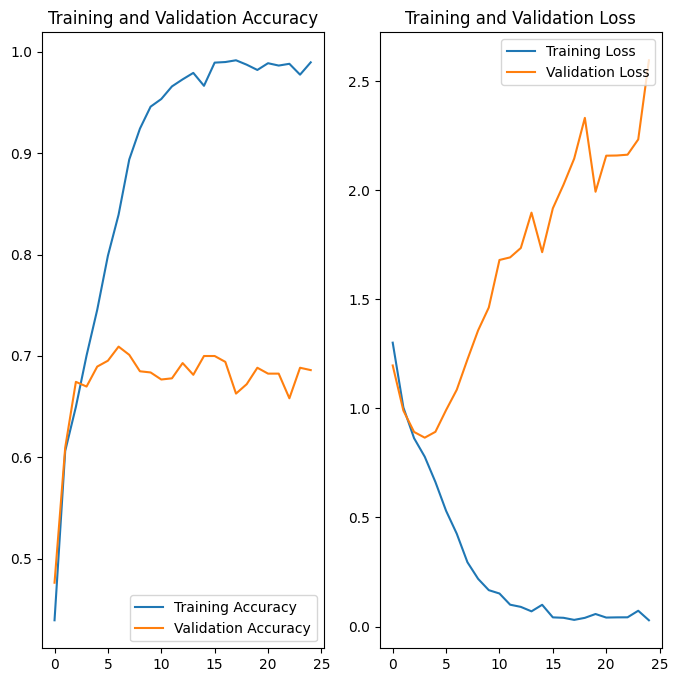

In [ ]:
num_classes=5
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255), #Представим изображение в виде [0; 1]
  layers.Conv2D(32, 3, padding='same', activation='relu'), #32 фильтра размером 3х3
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(96, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(96, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
     

epochs=25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Видим, что на тестовой выборке функция потерь возрастает, а метрика качества для тестовой выборки меньше, что свидетельствует о переобучении. Увеличим количество данных путем поворота, увеличения, обрезки изображений, изменении контраста. Уменьшим количество фильтров в каждом слое сверточной сети, количество нейронов в полносвязной сети и количество эпох обучения.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

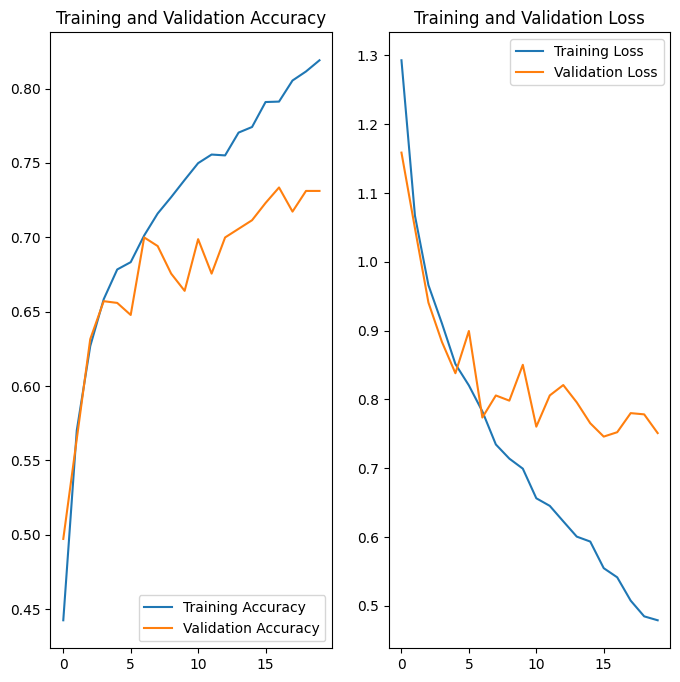

27/27 [==============================] - 13s 445ms/step - loss: 0.7511 - accuracy: 0.7312
accuracy: 73.11703562736511


In [5]:
num_classes=5
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomContrast(0.1),
    layers.experimental.preprocessing.RandomCrop(180,180),
    

  ]
)


model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(5)
])

model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
     

epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
score = model.evaluate(val_ds)
print("accuracy:", score[1]*100)

Из графиков видно, что функция потерь экспоненциально уменьшается. При проверке сети на тестовой выборке получаем метрику accuracy 73 %. Добавим в сеть несколько слоев dropout, которые исключают нейроны с вероятностью 0.3.

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 90, 90, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                      

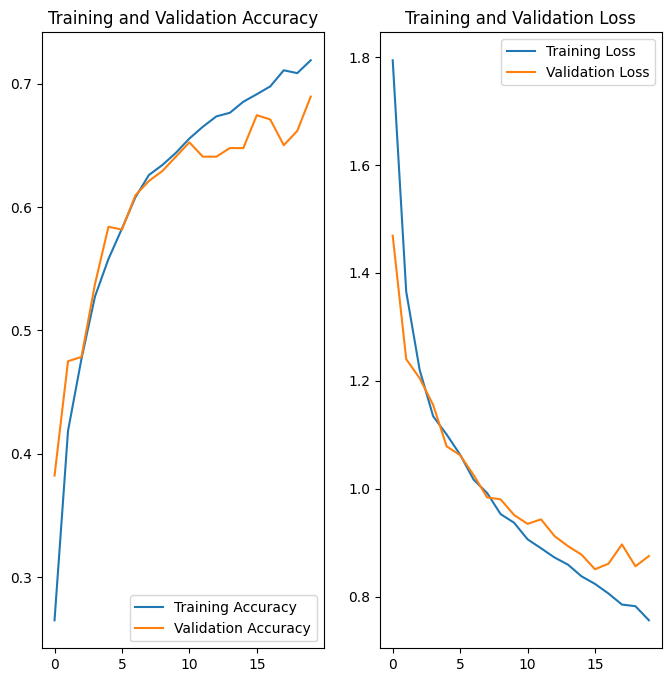

27/27 [==============================] - 11s 366ms/step - loss: 0.8752 - accuracy: 0.6895
accuracy: 68.94553899765015


In [6]:
num_classes=5
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomContrast(0.1),
    layers.experimental.preprocessing.RandomCrop(180,180),
    

  ]
)


model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu', activation='relu'),
  layers.Dense(5)
])

model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
     

epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
score = model.evaluate(val_ds)
print("accuracy:", score[1]*100)

В результате проверки сети на тестовой выборке значение метрики accuracy составляет 69%. Увеличим количество эпох обучения в 2 раза.

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 90, 90, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                      

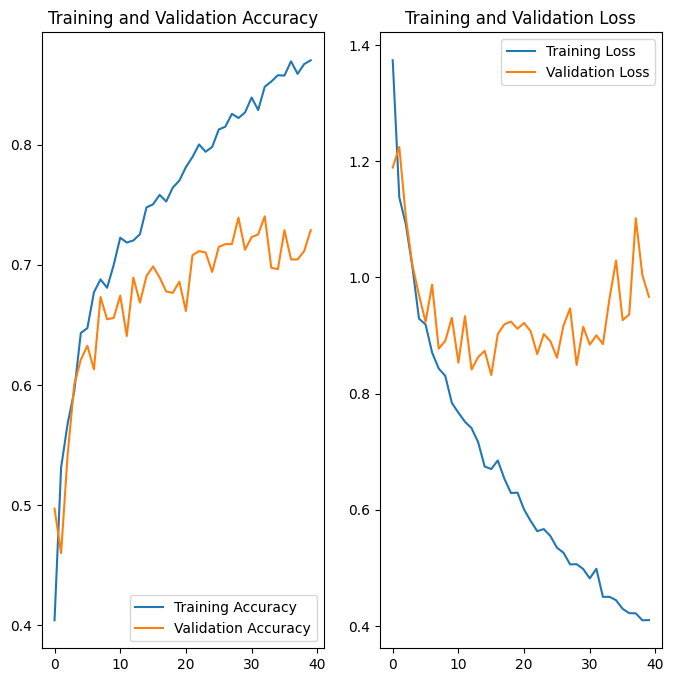

27/27 [==============================] - 12s 417ms/step - loss: 0.9668 - accuracy: 0.7289
accuracy: 72.88528680801392


In [ ]:
num_classes=5
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomContrast(0.1),
    layers.experimental.preprocessing.RandomCrop(180,180),
    

  ]
)


model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.Dropout(0.3),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(5)
])

model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
     

epochs=40
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
score = model.evaluate(val_ds)
print("accuracy:", score[1]*100)

В ходе обучения функция потерь начинает увеличиваться, начиная с 20 эпохи обучения. При проверке сети на тестовой выборке accuracy составляет 73%, следовательно, качество обучения несколько выше.
Используем предобученную сеть VGG16. Изменим количество эпох до 5, с целью уменьшения времени, потраченного на обучение.

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)

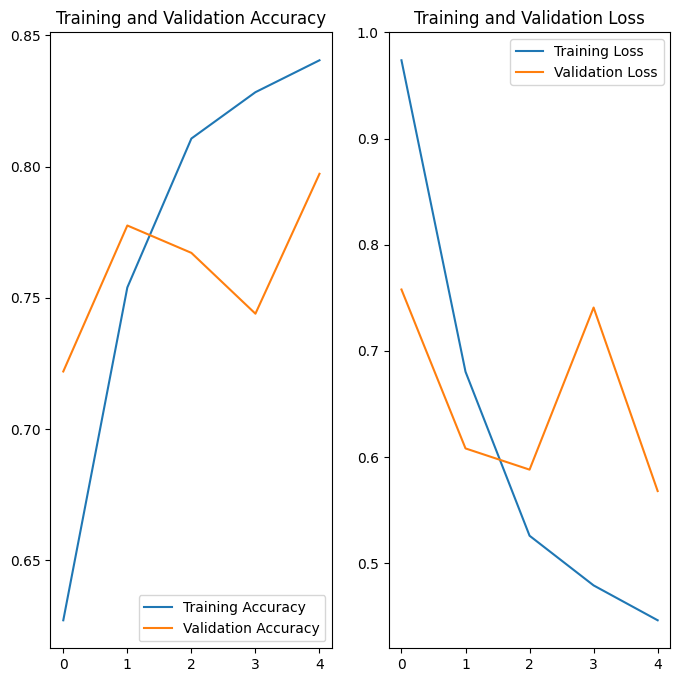

27/27 [==============================] - 307s 11s/step - loss: 0.5680 - accuracy: 0.7972
accuracy: 79.72189784049988


In [27]:
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/content/drive/MyDrive/data/flowers",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(180, 180),
  batch_size=32)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/content/drive/MyDrive/data/flowers",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(180, 180),
  batch_size=32)

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomContrast(0.1),
    layers.experimental.preprocessing.RandomCrop(180,180),
    

  ]
)

from tensorflow.keras.applications.vgg16 import VGG16


## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(180,180,3))
base_model.trainable = False ## Not trainable weights

print(base_model.summary())

from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')


model = models.Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)


epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
score = model.evaluate(val_ds)
print("accuracy:", score[1]*100)


В результате обучения модели архитектуры VGG16 метрика качества составляет 79 %, что является лучшим результатом из рассмотренных ранее архитектур. Для улучшения качества модели необходимо увеличить количество эпох обучения. Модель данной архитектуры обучается значительно дольше.

## Ответы на вопросы.



Как работает выбранная вами модель сверточной нейронной сети? Какие параметры?
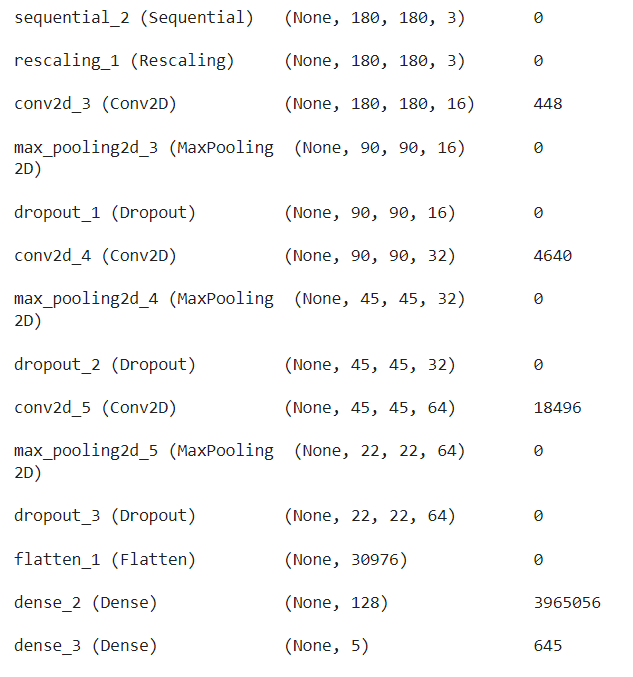




1) На вход первого слоя conv2d подаем изображение со значениями пикселей от 0 до 1. В параметрах указываем 32 фильтра размером 3х3, , padding='same' - добавляет рамку исходному изображению, activation - релейная функция активации. Количество коэффициентов - (3х3х3+1)*16=448
2) После слоя max_pooling изображение сжимается в 2 раза (размер 90х90).
3) Далее слой dropout, который с заданной вероятностью удаляет нейрон.
4)  На входе слоя Conv2d данные размером (90х90х16) обрабатываются 32-мя фильтрами. Количество коэффициентов - (3х3х16+1)х32=4640
5) После слоя max_pooling изображение сжимается в 2 раза (размер 45х45).
6) На входе слоя Conv2d данные размером (45х45х32) обрабатываются 64-мя фильтрами. Количество коэффициентов - (3х3х32+1)х64=18496
7)  После слоя max_pooling изображение сжимается в 2 раза (размер 22х22)
8) Слой Flatten представляет данные единым вектором, размер которого 22х22х64=30976
9) На вход слоя Dense подается вектор размером 30977. Нейронов - 128. Коэффициентов 128х30977=3965056
10) На вход слоя Dense подается вектор размером 128. Нейронов - 5. Коэффициентов 128х5=645




Добавте описание архитектуры выбранной Вами предобученой сверточной нейронной сети. Архитектура сети VGD16  представлена на рисунке ниже. Алгоритм работы аналогичен предыдущей сети.

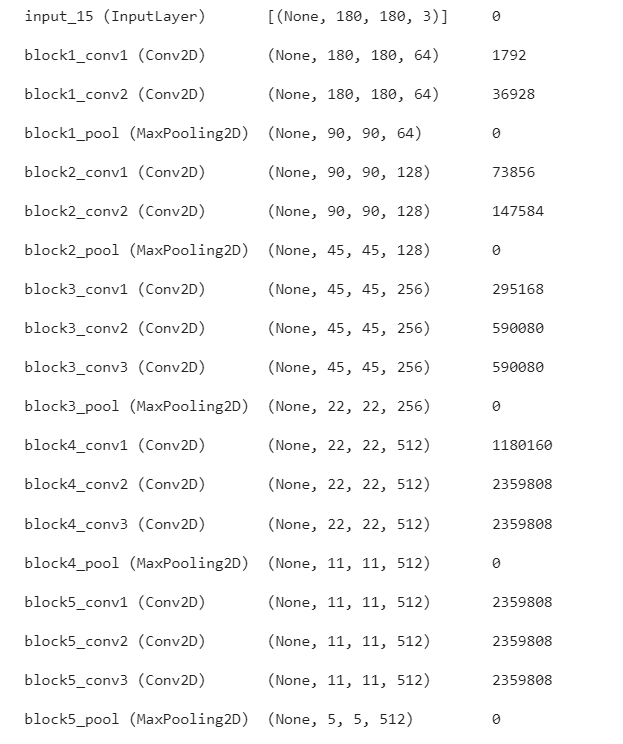

В чем основные отличия между сверточной нейронной сетью и "обычной" полносвязной нейронной сетью?
Сверточная нейронная сеть содержит хотя бы один сверточный слой.


**Вывод:** в ходе лабораторной работы изучены сверточные нейронные сети, построены и обучены сети с различными параметрами. Проведена оценка качества моделей с помощью метрики accuracy и построены графики в ходе обуения моделей. В результате оценки моделей на тестовых выборках точность составляет 73%. Оценка модели VGG16 составляет 79%. 